In [18]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.lda import LDA
import matplotlib.cm as cm
%matplotlib inline

In [3]:
digits = load_digits()
data = digits.data

In [5]:
n_samples,n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

In [9]:
pca = PCA(n_components = 10)
data_r = pca.fit(data).transform(data)

In [11]:
print('Explained variance ratio (first two components): %s' %str(pca.explained_variance_ratio_))
print('Sum of explained variance (first two components): %s' %str(sum(pca.explained_variance_ratio_)))

Explained variance ratio (first two components): [ 0.14890594  0.13618771  0.11794594  0.08409979  0.05782415  0.0491691
  0.04315987  0.03661373  0.03353248  0.03078806]
Sum of explained variance (first two components): 0.738226768846


In [13]:
x = np.arange(10)
ys = [i+x+(i*x)**2 for i in range(10)]

//anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


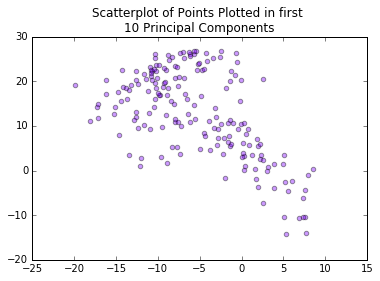

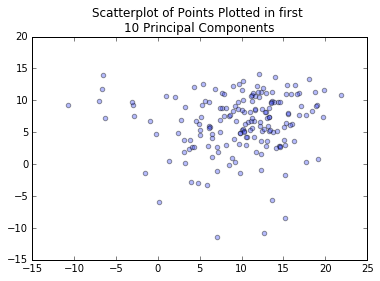

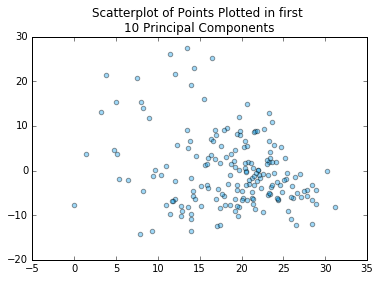

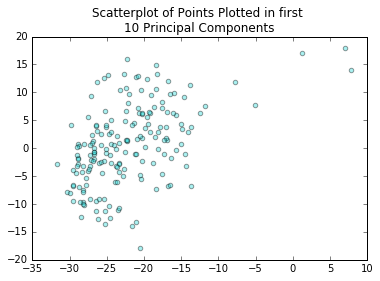

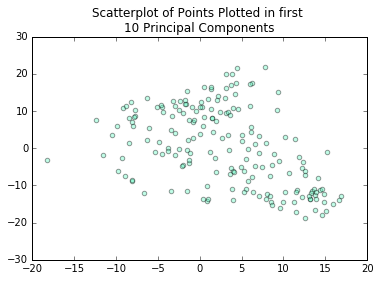

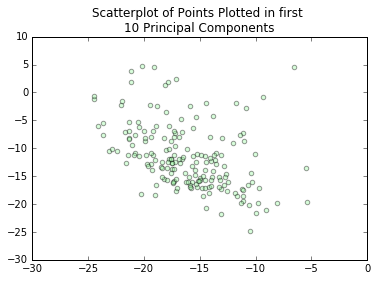

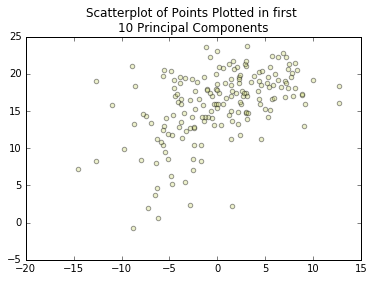

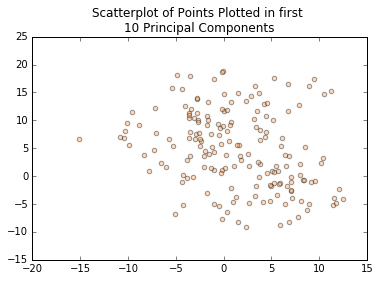

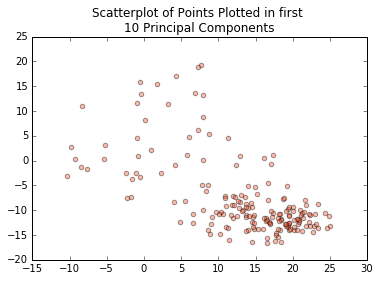

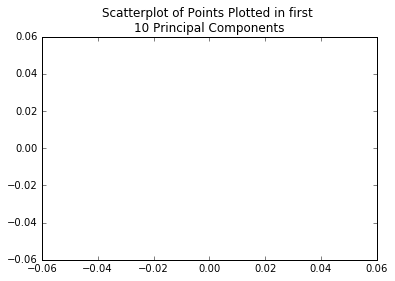

In [19]:
plt.figure()
colors = cm.rainbow(np.linspace(0,1,len(ys)))
for c, i,target_name in zip(colors,[1,2,3,4,5,6,7,8,9,10],labels):
    plt.scatter(data_r[labels == i,0],data_r[labels ==i,1],c=c,alpha = 0.4)
    plt.legend()
    plt.title('Scatterplot of Points Plotted in first \n'
             '10 Principal Components')
    plt.show()

In [25]:
from time import time
from sklearn.cluster import KMeans
np.random.seed()

In [32]:
import sklearn.metrics as metrics 
data= scale(digits.data)
sample_size = 300
print('n_digits: %d, \t n_samples %d, \t n_features %d' % (n_digits, n_samples, n_features))

def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print(metrics.homogeneity_score(labels,estimator.labels_),
         metrics.completeness_score(labels,estimator.labels_),
         metrics.v_measure_score(labels,estimator.labels_),
         metrics.adjusted_rand_score(labels,estimator.labels_),
         metrics.silhouette_score(data,estimator.labels_,metric = 'euclidean',sample_size = sample_size))
bench_k_means(KMeans(init = 'k-means++', n_clusters = n_digits,n_init = 10), name = 'k-means++',data = data)

n_digits: 10, 	 n_samples 1797, 	 n_features 64
0.679549433446 0.7181075351 0.698296620147 0.570886859799351 0.150262313192


In [33]:
pca = PCA(n_components = 10).fit(data)
bench_k_means(KMeans(init = pca.components_, n_clusters = 10), name = 'PCA-based',data = data)

0.673116083495 0.714577624507 0.693227459616 0.567141976920323 0.113294967642


//anaconda/lib/python3.5/site-packages/sklearn/cluster/k_means_.py:821: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  n_jobs=self.n_jobs)
